Introdução

Descrição do projeto

De forma fictícia, sou analista na Lista de Eixo de Manivela. Centenas de propagandas gratuitas de veículos são publicadas no site todos os dias. Vamos estudar os dados coletados nos últimos anos e determinar quais fatores influenciaram o preço de um veículo.

Primeiro, vamos estudar como os valores atípicos influenciam as diversas variáveis como: preço, idade do veículo, data que propaganda foi colocada e etc.

Depois, vamos trabalhar com um dataframe filtrado sem os valores atípicos e vamos utilizar ele como base para comparar os seus resultados com o dataframe não filtrado.

Por fim vamos analisar o número de propagandas e o preço médio para cada modelo de veículo e identificar/estudar o que influenciou no preço dos veículos.

In [1]:
#Importando biblioteca pandas, biblioteca matplotlib e seaborn para visualização de dados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Carregando arquivo em CSV e definindo dentro da variável 'df'
try: 
    df = pd.read_csv('vehicles_us.csv')
except: 
    df = pd.read_csv('/datasets/vehicles_us.csv')

In [3]:
#Visualizando informações gerais do 'df'
df.info()
df.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [4]:
#Visualizando informações com o método 'describe()'
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [5]:
#Verificando valores duplicados
#É possível que não tenhamos valores duplicados, visto que os carros não tem ID, então podem ser carros com as mesmas características, mas diferentes entre si.
df.duplicated().sum()

0

Possíveis razões da tabela conter valores ausentes:

1 - Anúncios sem foto do carro, o que dificulta a identificação da cor.

2 - Erro na leitura de certos dados.

3 - Carros sem a documentação correta, o que dificulta a identificação do ano de fabricação e cilindragem.

4 - Carros com odômetro zerado manualmente pelo vendedor para facilitar a venda do veículo.


In [6]:
#Investigando valores ausentes 
df_model_valores_ausentes = df.isna().sum()



In [7]:
#Verificando a porcentagem de valores ausentes para definir próximos passos
df_model_valores_ausentes/df['model_year'].size

price           0.000000
model_year      0.070238
model           0.000000
condition       0.000000
cylinders       0.102086
fuel            0.000000
odometer        0.153168
transmission    0.000000
type            0.000000
paint_color     0.179854
is_4wd          0.503697
date_posted     0.000000
days_listed     0.000000
dtype: float64

In [8]:
#De uma forma geral, parece que os valores ausentes são aleatórios, exceto a coluna 'is_4wd' que apresenta '1.0' e 'NaN'.
#Vamos determinar que os carros que possuem 'NaN' são carros que não possuem tração 4x4.
df['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

In [9]:
#Vamos começar preenchendo com '0.0' os valores ausentes da coluna 'is_4wd'.
df['is_4wd'] = df['is_4wd'].fillna(value = 0.0)


In [10]:
#Checando coluna 'is_4wd' depois de ter preenchido os valores 'NaN'
df['is_4wd'].isna().sum()

0

In [11]:
#Checando com value_counts():
df['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

In [12]:
#Vamos preencher os valores ausentes de 'model_year' pela média de 'model_year' de cada modelo ('model')
#Criando pivot_table alternativa para obter a média de 'model_year' por 'model'
df_pivot_table = df.pivot_table(index='model', values = 'model_year', aggfunc = 'mean')

In [13]:
#Arredondando 'model_year' para não ficarem valores decimais
df_pivot_table['model_year'] = df_pivot_table['model_year'].round()

In [14]:
#Definindo o índice de 'df' para 'model', assim vamos conseguir os pares de índices comparando com a pivot_table alternativa
df.set_index('model', inplace = True)

In [15]:
#Preenchendo os valores ausentes da coluna 'model_year' pela média de 'model_year' de cada 'model'
df['model_year'] = df['model_year'].fillna(value = df_pivot_table['model_year'])

In [16]:
#Verificando valores ausentes na coluna 'model_year'
df['model_year'].isna().sum()

0

In [17]:
#Vamos preencher os valores ausentes de 'cylinders' pela média de 'cylinders' para cada modelo ('model'):
#Criando pivot_table alternativa para obter a média de 'cylinders' por 'model'
df_pivot_table_cylinders = df.pivot_table(index = 'model', values = 'cylinders', aggfunc = 'mean')


In [18]:
#Arredondando valores
df_pivot_table_cylinders['cylinders'] = df_pivot_table_cylinders['cylinders'].round()

In [19]:
#Preenchendo os valores ausentes da coluna 'cylinders' pela média de 'cylinders' para cada modelo('model')
df['cylinders'] = df['cylinders'].fillna(value = df_pivot_table_cylinders['cylinders'])

In [20]:
#Verificando se valores ausentes foram substituídos
df['cylinders'].isna().sum()

0

In [21]:
#Redefinindo o índice
df.reset_index(inplace = True)

In [22]:
#Vamos preencher os valores ausentes de 'odometer' pela média de 'odometer' de todos modelos
#Definindo a média de 'odometer'
df_odometer_mean = df['odometer'].mean()

In [23]:
#Preenchendo os valores ausentes da coluna 'odometer':
df['odometer'] = df['odometer'].fillna(value = df_odometer_mean)

In [24]:
#Checando valores ausentes
df['odometer'].isna().sum()

0

In [25]:
#Vamos preencher os valores ausentes da variável categórica 'paint_color' com 'NE' de não especificado
df['paint_color'] = df['paint_color'].fillna(value = 'NE')

In [26]:
#Checando valores ausentes na coluna 'paint_color'
df['paint_color'].isna().sum()

0

In [27]:
#Exibindo df e informações gerais novamente
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         51525 non-null  object 
 1   price         51525 non-null  int64  
 2   model_year    51525 non-null  float64
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


,model,price,model_year,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,bmw x5,9400,2011.0,good,6.0,gas,145000.000000,automatic,SUV,NE,1.0,2018-06-23,19
1,ford f-150,25500,2009.0,good,6.0,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50
2,hyundai sonata,5500,2013.0,like new,4.0,gas,110000.000000,automatic,sedan,red,0.0,2019-02-07,79
3,ford f-150,1500,2003.0,fair,8.0,gas,115553.461738,automatic,pickup,NE,0.0,2019-03-22,9
4,chrysler 200,14900,2017.0,excellent,4.0,gas,80903.000000,automatic,sedan,black,0.0,2019-04-02,28
5,chrysler 300,14990,2014.0,excellent,6.0,gas,57954.000000,automatic,sedan,black,1.0,2018-06-20,15
6,toyota camry,12990,2015.0,excellent,4.0,gas,79212.000000,automatic,sedan,white,0.0,2018-12-27,73
7,honda pilot,15990,2013.0,excellent,6.0,gas,109473.000000,automatic,SUV,black,1.0,2019-01-07,68
8,kia sorento,11500,2012.0,excellent,4.0,gas,104174.000000,automatic,SUV,NE,1.0,2018-07-16,19
9,honda pilot,9200,2008.0,excellent,6.0,gas,147191.000000,automatic,SUV,blue,1.0,2019-02-15,17


Vamos trocar o tipo de dado para algumas colunas:

1 - 'model_year' p/ int64

2 - 'cylinders' p/ int64

3 - 'is_4wd' p/ int64

4 - 'date_posted p/ datetime


In [28]:
#Trocando tipos de dados para as colunas citadas acima:
df['model_year'] = df['model_year'].astype('int64')
df['cylinders'] = df['cylinders'].astype('int64')
df['is_4wd'] = df['is_4wd'].astype('int64')
df['date_posted'] = pd.to_datetime(df['date_posted'], format = '%Y-%m-%d')

In [29]:
#Exbindo informações gerais novamente:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   model         51525 non-null  object        
 1   price         51525 non-null  int64         
 2   model_year    51525 non-null  int64         
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  int64         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 5.1+ MB


In [30]:
#Adicionando coluna de dia da semana na tabela
df['week_day'] = df['date_posted'].dt.weekday

In [31]:
#Adicionando mês que a propagando foi colocada
df['month'] = df['date_posted'].dt.month

In [32]:
#Adicionando o ano em que a propaganda foi colocada
df['year'] = df['date_posted'].dt.year

In [33]:
#Criando coluna de 'idade' do carro
df['vehicle_age'] = df['date_posted'].dt.year - df['model_year']

In [34]:
#Criando a coluna com a média de quilômetragem por ano por veículo
df['mean_odometer'] = df['odometer'] / df['vehicle_age']

In [35]:
#Visualizando valores na coluna 'condition'
df['condition'].value_counts()

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

In [36]:
#Categorizando/Substituindo valores string da coluna 'condition' por valores númericos
#Criando função para categorização
def subs_valores (row):
    if row['condition'] == 'excellent':
        return 3
    if row['condition'] == 'good':
        return 2
    if row ['condition'] == 'like new':
        return 4
    if row['condition'] == 'fair':
        return 1
    if row['condition'] == 'new':
        return 5
    if row['condition'] == 'salvage':
        return 0
#Alterando valores string por números
df['condition'] = df.apply(subs_valores, axis = 1)

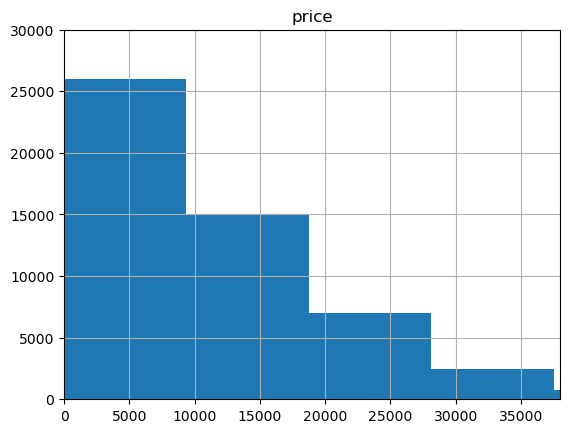

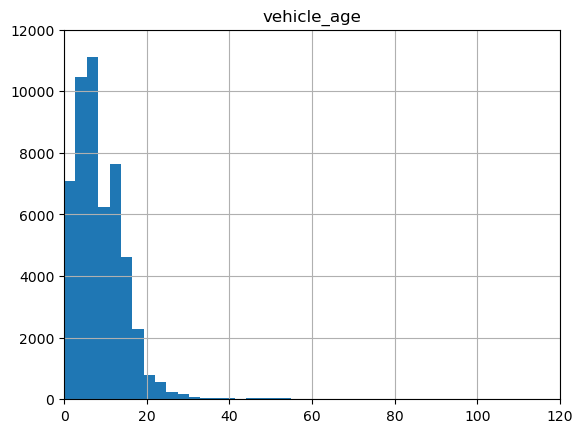

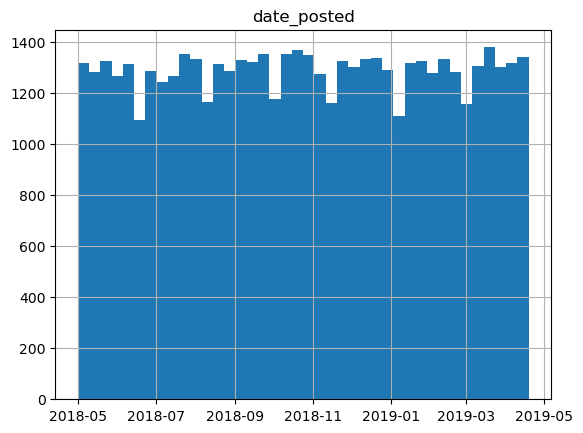

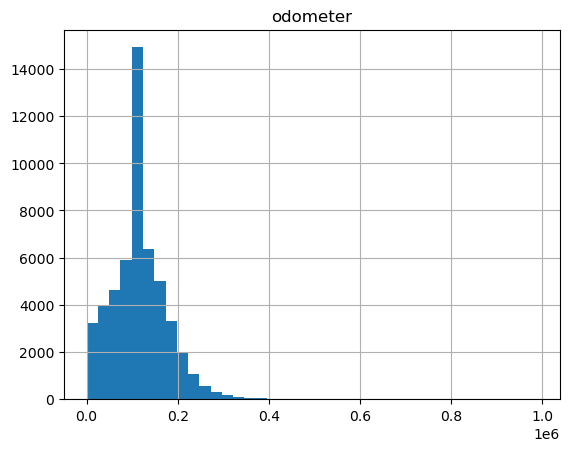

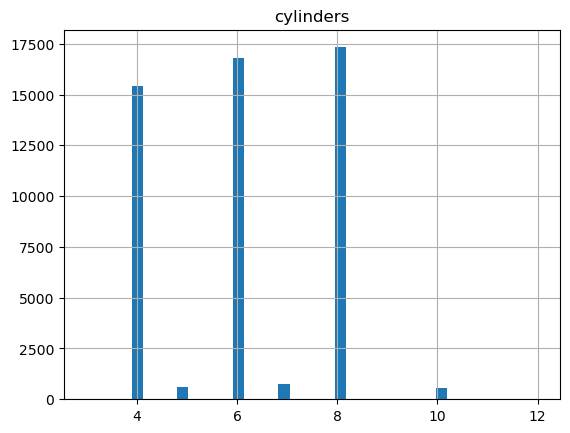

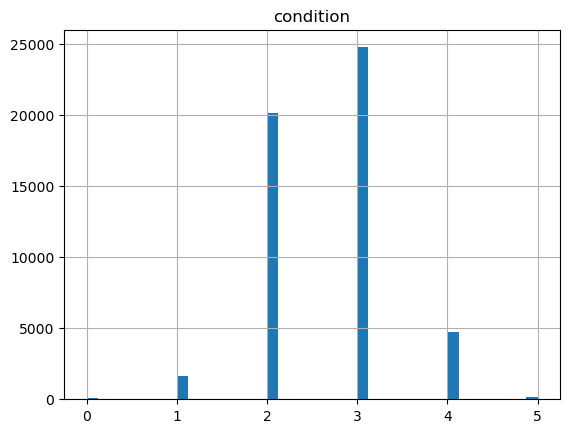

In [37]:
#Criando histogramas paras as seguintes colunas através de um ciclo
colunas = ['price','vehicle_age','date_posted','odometer','cylinders','condition']
for col in colunas:
    if col == 'price':
        df.hist(col, bins = 40)
        plt.ylim(0,30000)
        plt.xlim(0,38000)
    if col == 'vehicle_age':
        df.hist(col,bins = 40)
        plt.ylim(0,12000)
        plt.xlim(0,120)
    if col != 'price' and col != 'vehicle_age':
        df.hist(col, bins = 40)
    
    
        

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

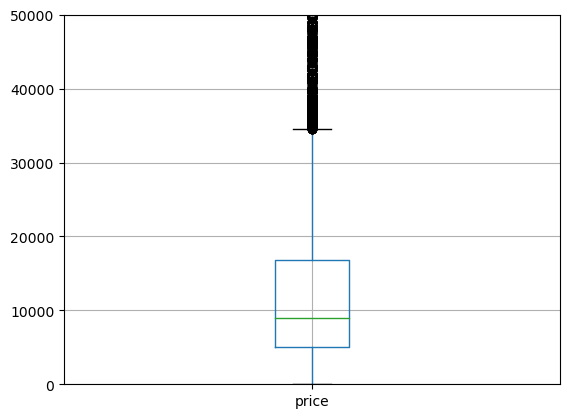

In [38]:
#Verificando mais de perto a coluna 'price' com diagramas de caixa
df.boxplot('price')
plt.ylim(0,50000)
df['price'].describe()

In [39]:
#Calculando limite dos bigodes para a coluna 'price'
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
extremo_bigode_price = Q3 + (1.5*IQR)

In [40]:
#Calculando limite dos bigodes para a coluna 'vehicle_year'
Q1 = df['vehicle_age'].quantile(0.25)
Q3 = df['vehicle_age'].quantile(0.75)
IQR = Q3 - Q1
extremo_bigode_vy = Q3 + (1.5*IQR)

In [41]:
#Calculando limite dos bigodes para a coluna 'odometer'
Q1 = df['odometer'].quantile(0.25)
Q3 = df['odometer'].quantile(0.75)
IQR = Q3 - Q1
extremo_bigode_odometer = Q3 + (1.5*IQR)

count    51525.000000
mean         8.556545
std          6.111038
min          0.000000
25%          4.000000
50%          8.000000
75%         12.000000
max        110.000000
Name: vehicle_age, dtype: float64

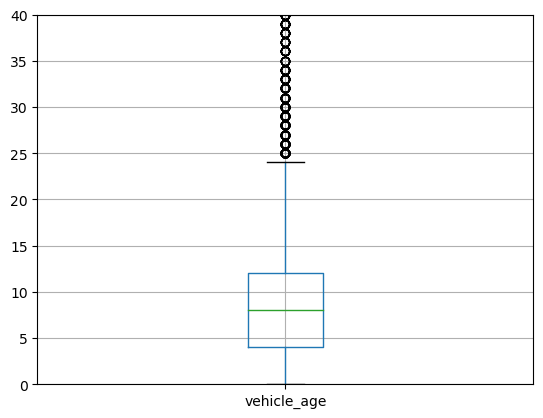

In [42]:
#Verificando mais de perto a coluna 'vehicle_year' com diagrama de caixa
df.boxplot('vehicle_age')
plt.ylim(0,40)
df['vehicle_age'].describe()

count     51525.000000
mean     115553.461738
std       59902.205520
min           0.000000
25%       79181.000000
50%      115553.461738
75%      146541.000000
max      990000.000000
Name: odometer, dtype: float64

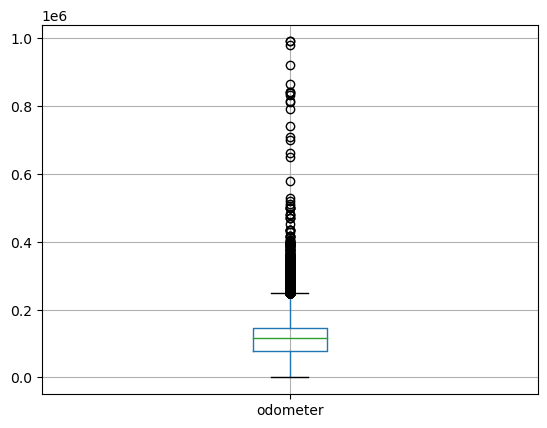

In [43]:
#Olhando mais de perto a coluna 'odometer' com diagrama de caixa
df.boxplot('odometer')
df['odometer'].describe()

count    51525.000000
mean         6.120873
std          1.654001
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

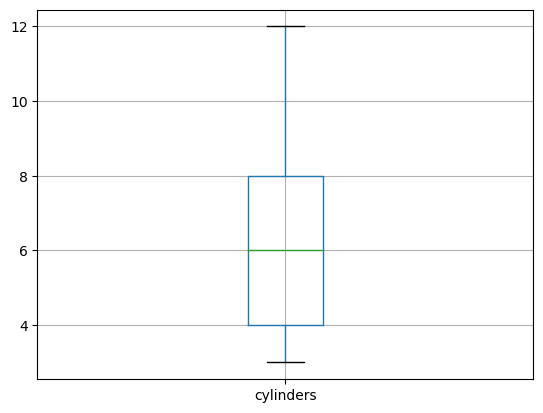

In [44]:
#Olhando mais de perto a coluna 'cylinders'
df.boxplot('cylinders')
df['cylinders'].describe()

In [45]:
#Vamos recortar o dataframe excluindo valores atípicos das colunas: 'price','vehicle_year' e 'odometer'
filtered_df = df.query('price <= @extremo_bigode_price & vehicle_age <= @extremo_bigode_vy & odometer <= @extremo_bigode_odometer')

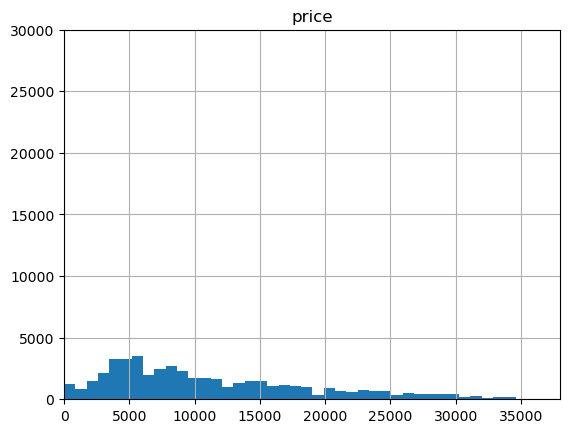

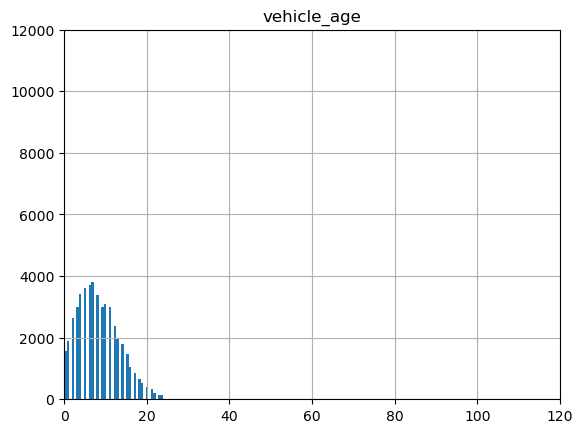

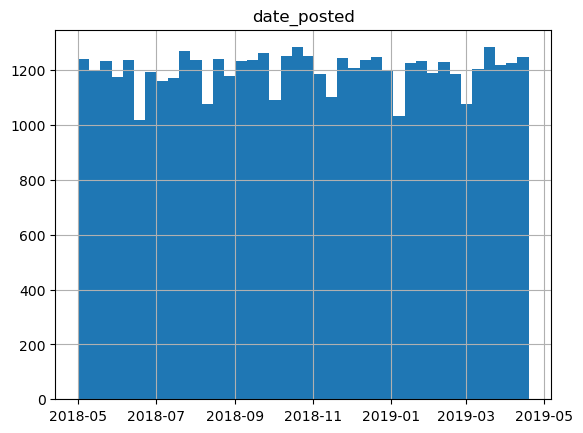

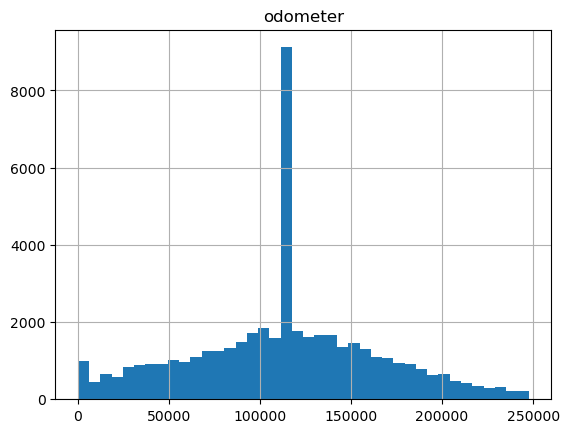

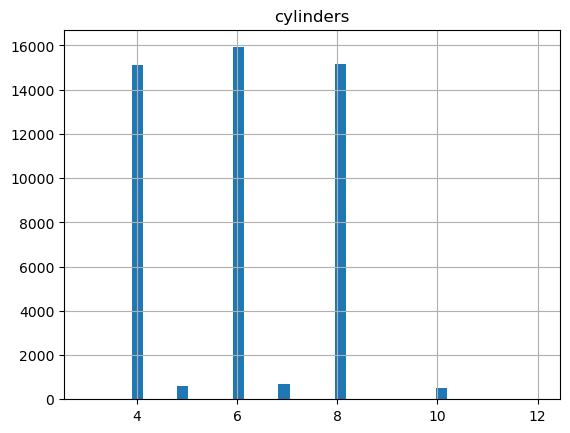

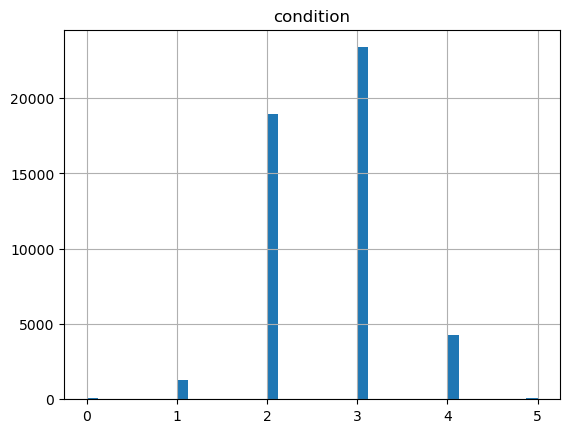

In [46]:
#Recriar histogramas para os dados filtrados
for col in colunas:
    if col == 'price':
        filtered_df.hist(col, bins = 40)
        plt.ylim(0,30000)
        plt.xlim(0,38000)
    if col == 'vehicle_age':
        filtered_df.hist(col,bins = 40)
        plt.ylim(0,12000)
        plt.xlim(0,120)
    if col != 'price' and col != 'vehicle_age':
        filtered_df.hist(col, bins = 40)
    

Diferenças entre histogramas:

1) Com o novo histograma da coluna 'price', observa-se que a maior concentração da coluna 'price' está entre 0 e 35.000.
2) Com o novo histograma da coluna 'vehicle_age', observa-se que a maior concentração da coluna 'vehicle_age' está entre 0 e 20 e poucos anos.
3) As colunas 'date_posted', 'condition' e 'cylinders' não mexi pois não possuiam valores atípicos
4) Com o novo histrograma da coluna 'odometer', observa-se um pico de concentração entre 100000 e 150000.

array([[<AxesSubplot:title={'center':'days_listed'}>]], dtype=object)

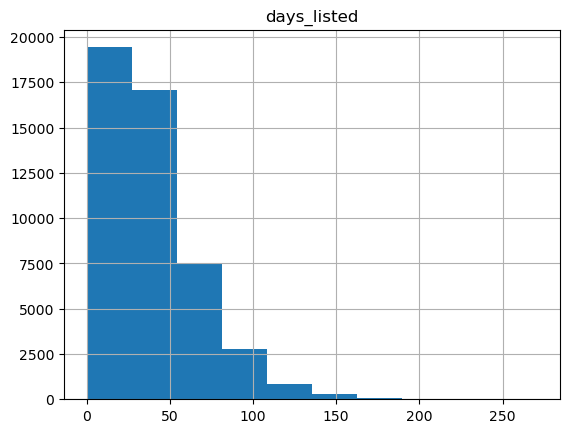

In [47]:
#Construindo um histograma para a coluna 'days_listed'
filtered_df.hist('days_listed')

count    48055.000000
mean        39.537821
std         28.214071
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

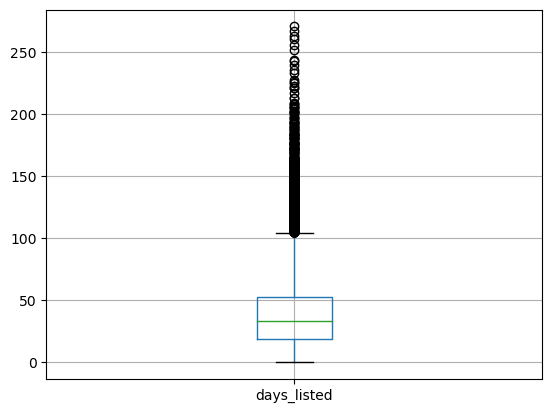

In [48]:
#Olhando mais de perto a coluna 'days_listed' com diagrama de caixa
filtered_df.boxplot('days_listed')
filtered_df['days_listed'].describe()

In [49]:
#Calculando a média e a mediana para a coluna 'days_listed'
days_listed_mean = filtered_df['days_listed'].mean()
days_listed_median = filtered_df['days_listed'].median()


In [50]:
#Olhando a mediana
days_listed_median

33.0

Descrevendo o tempo de vida útil de uma propaganda:
 - É a mediana, pois ela reflete melhor a o tempo de vida útil geral dos produtos e não considera valores atípicos presentes na coluna 'days_listed'.

In [51]:
#Determinando quando as propagandas foram removidas rapidamente e as que demoraram mais tempo
fast_days_listed = filtered_df.query('days_listed < 20')
slow_days_listed = filtered_df.query('days_listed > 100')

In [52]:
#Criando pivot table para analisar a contagem de propagandas por modelo e a média de preço por modelo nas propagandas rápidas
fast_days_listed_pv = fast_days_listed.pivot_table(index='model', values = 'price', aggfunc = ['count','mean'])
fast_days_listed_pv.columns = ['count','mean']

In [53]:
#Exibindo pivot_table
fast_days_listed_pv

,count,mean
model,,
acura tl,63,6188.634921
bmw x5,64,10310.000000
buick enclave,78,11457.525641
cadillac escalade,65,12800.138462
chevrolet camaro,93,13524.161290
...,...,...
toyota sienna,88,7434.761364
toyota tacoma,185,15567.686486
toyota tundra,129,13405.875969


Text(0.5, 1.0, 'Número de propagandas por modelo')

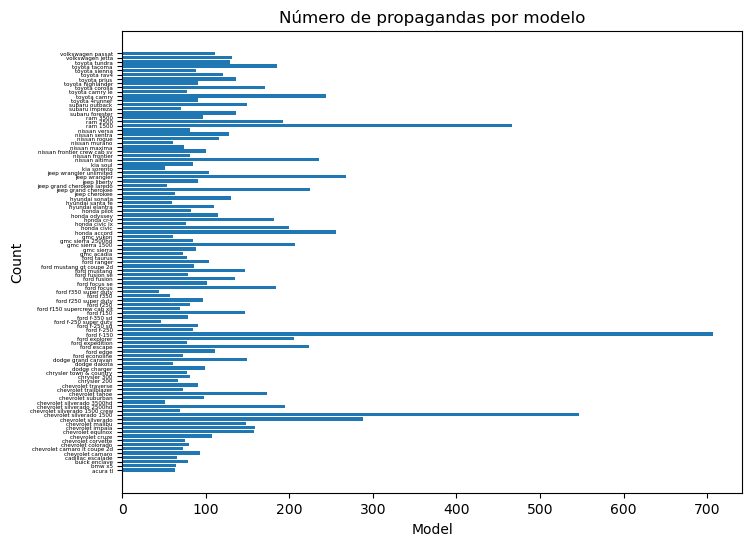

In [54]:
#Gráfico que mostra a dependência do número de propagandas para cada modelo de veículo
plt.figure(figsize=(8, 6))
plt.barh(fast_days_listed_pv.index,fast_days_listed_pv['count'])
plt.xlabel('Model')
plt.yticks(fontsize =4)
plt.ylabel('Count')
plt.title('Número de propagandas por modelo')

In [55]:
#Selecionando os dois veículos com mais propagandas
fast_days_listed_pv.query('count > 500')

,count,mean
model,,
chevrolet silverado 1500,547,15410.159049
ford f-150,707,13137.070721


In [56]:
#Criando pivot table para analisar a contagem de propagandas por modelo e a média de preço por modelo nas propagandas longas
slow_days_listed_pv = slow_days_listed.pivot_table(index='model', values = 'price', aggfunc = ['count','mean'])
slow_days_listed_pv.columns = ['count','mean']

In [57]:
#Exibindo pivot_table
slow_days_listed_pv

,count,mean
model,,
acura tl,9,7152.777778
bmw x5,13,8850.538462
buick enclave,9,9142.000000
cadillac escalade,15,14116.600000
chevrolet camaro,14,10390.357143
...,...,...
toyota sienna,15,9949.200000
toyota tacoma,22,11601.363636
toyota tundra,15,14066.866667


Text(0.5, 1.0, 'Número de propagandas por modelo')

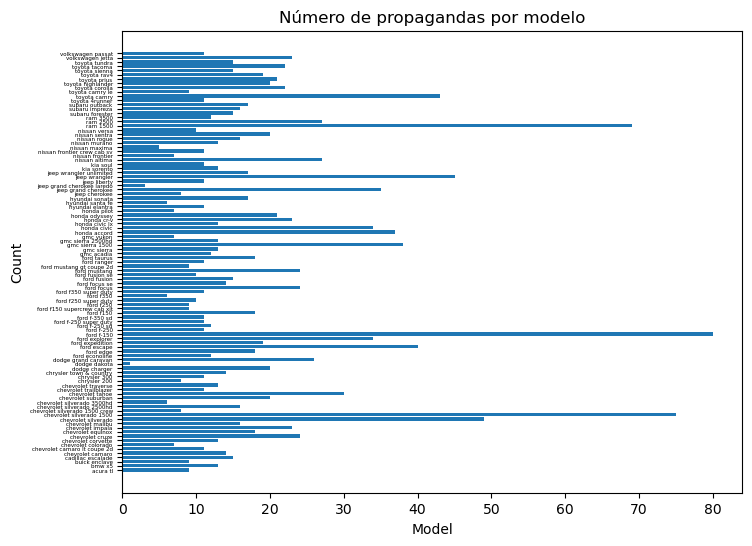

In [58]:
#Gráfico que mostra a dependência do número de propagandas para cada modelo de veículo
plt.figure(figsize=(8, 6))
plt.barh(slow_days_listed_pv.index,slow_days_listed_pv['count'])
plt.xlabel('Model')
plt.ylabel('Count')
plt.yticks(fontsize =4)
plt.title('Número de propagandas por modelo')



In [59]:
#Selecionando os dois veículos com mais propagandas
slow_days_listed_pv.query('count > 70')

,count,mean
model,,
chevrolet silverado 1500,75,15646.386667
ford f-150,80,12999.500000


Com essas análises, chega-se a conclusão de que os veículos que são vendidos mais rapidamente, são os veículos que contém mais propaganda. Enquanto que os que demoram para ser vendidos são veículos que possuem menos propagandas

In [60]:
#Criando tabela filtrada pelo 'model' 'chevrolet silverado 1500'
df_chevrolet_silverado_1500 = filtered_df[filtered_df['model'] == 'chevrolet silverado 1500']

<AxesSubplot:xlabel='transmission', ylabel='price'>

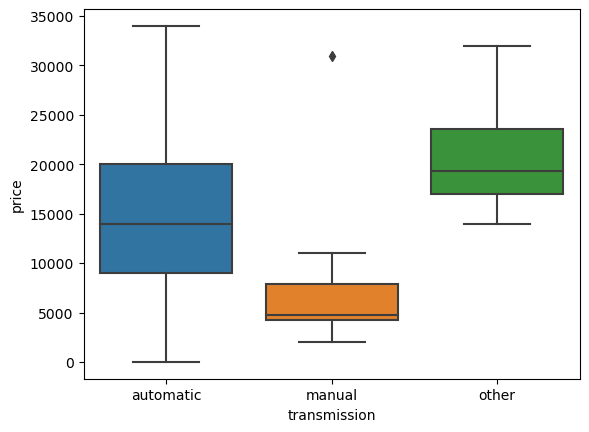

In [61]:
#Criando gráfico para visualizar os diagramas de caixa para as variáveis da coluna 'transmission'
sns.boxplot(x = 'transmission', y = 'price', data = df_chevrolet_silverado_1500)

In [62]:
#Verificando com mais detalhes informações da função 'describe()'
df_chevrolet_silverado_1500.groupby('transmission')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
transmission,,,,,,,,
automatic,2005.0,15141.297257,8003.157718,1.0,8950.00,13995.0,19999.00,34000.0
manual,18.0,7036.111111,6398.271953,2000.0,4275.00,4700.0,7887.50,31000.0
other,4.0,21160.000000,7729.815651,13995.0,16961.25,19325.0,23523.75,31995.0


<AxesSubplot:xlabel='paint_color', ylabel='price'>

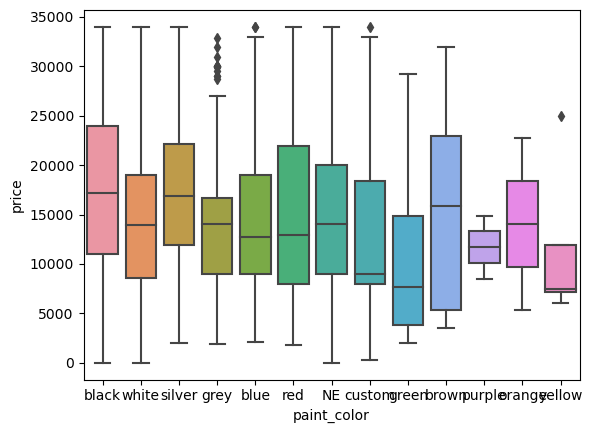

In [63]:
#Criando gráfico para visualizar os diagramas de caixa para as variáveis da coluna 'paint_color'
sns.boxplot(x='paint_color',y = 'price', data = df_chevrolet_silverado_1500)

In [64]:
#Verificando com mais detalhes informações da função 'describe()'
df_chevrolet_silverado_1500.groupby('paint_color')['price'].describe().sort_values(by = 'mean', ascending = True)

,count,mean,std,min,25%,50%,75%,max
paint_color,,,,,,,,
green,40.0,11193.250000,9172.855775,2000.0,3800.00,7675.0,14900.0,29250.0
yellow,4.0,11496.250000,9026.719942,6000.0,7121.25,7495.0,11870.0,24995.0
purple,2.0,11700.000000,4525.483400,8500.0,10100.00,11700.0,13300.0,14900.0
custom,51.0,12595.686275,7962.964412,233.0,7987.50,8990.0,18350.0,33955.0
orange,2.0,14057.000000,12353.155467,5322.0,9689.50,14057.0,18424.5,22792.0
blue,171.0,14063.807018,7378.756143,2100.0,8997.50,12750.0,18991.5,33995.0
grey,184.0,14073.309783,7049.090853,1877.0,8990.00,13995.0,16625.0,32900.0
white,495.0,14400.349495,7861.400611,1.0,8591.50,13900.0,18992.5,33995.0
red,195.0,14658.497436,8285.750167,1750.0,7999.00,12950.0,21946.0,33990.0


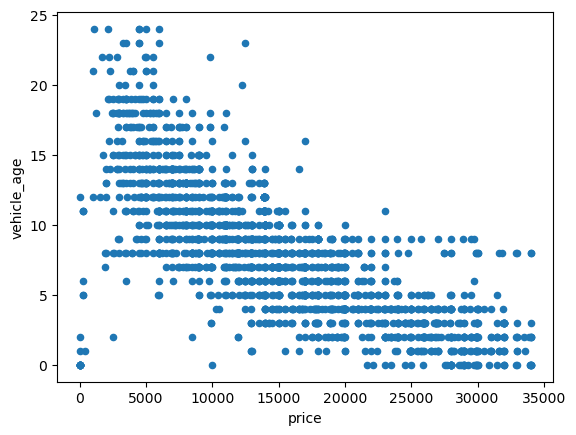

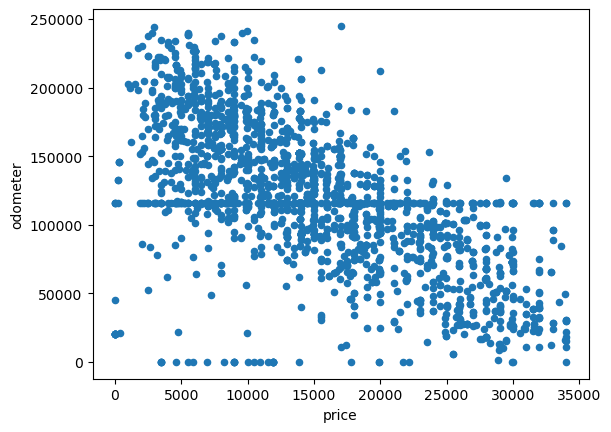

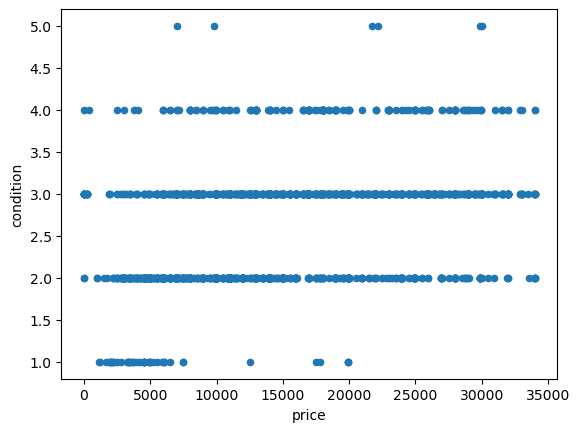

In [65]:
#Criando gráficos de dispersão para as variáveis 'vehicle_year','odometer' e 'condition'
colunas_2 = ['vehicle_age','odometer','condition']
for col in colunas_2:
    df_chevrolet_silverado_1500.plot(x='price',y=col,kind = 'scatter')

In [66]:
#Criando tabela filtrada pelo 'model' 'ford f-150'
df_ford_150 = filtered_df[filtered_df['model'] == 'ford f-150']

<AxesSubplot:xlabel='transmission', ylabel='price'>

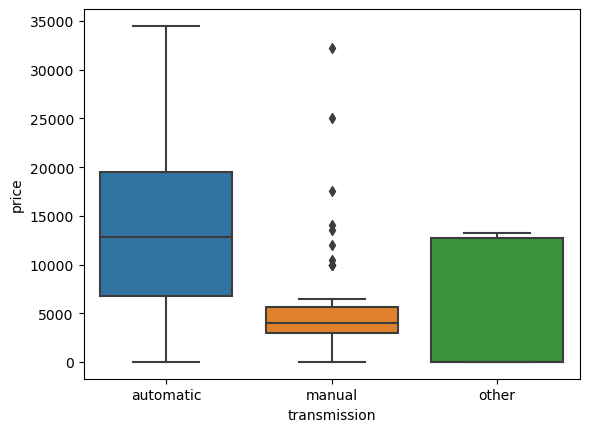

In [67]:
#Criando gráfico para visualizar os diagramas de caixa para as variáveis da coluna 'transmission'
sns.boxplot(x = 'transmission', y = 'price', data = df_ford_150)

In [68]:
#Verificando com mais detalhes informações da função 'describe()'
df_ford_150.groupby('transmission')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
transmission,,,,,,,,
automatic,2515.0,13626.896620,8267.636461,1.0,6725.0,12795.0,19544.5,34500.0
manual,55.0,5630.054545,5764.375628,1.0,2972.5,3995.0,5622.5,32200.0
other,26.0,4414.500000,6206.506749,1.0,1.0,1.0,12770.0,13195.0


<AxesSubplot:xlabel='paint_color', ylabel='price'>

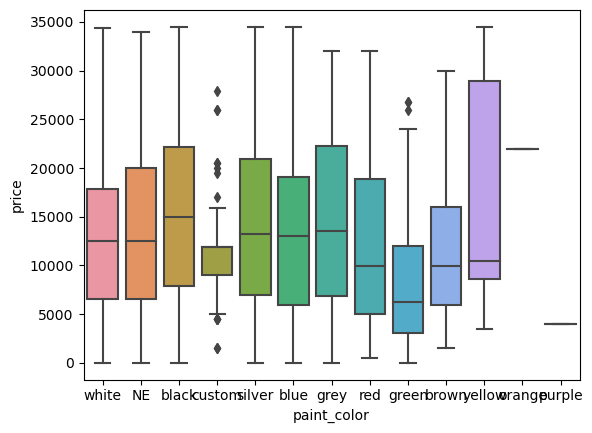

In [69]:
#Criando gráfico para visualizar os diagramas de caixa para as variáveis da coluna 'paint_color'
sns.boxplot(x='paint_color',y = 'price', data = df_ford_150)

In [70]:
#Verificando com mais detalhes informações da função 'describe()'
df_ford_150.groupby('paint_color')['price'].describe().sort_values(by = 'mean', ascending = True)

,count,mean,std,min,25%,50%,75%,max
paint_color,,,,,,,,
purple,1.0,4000.000000,NaN,4000.0,4000.00,4000.0,4000.00,4000.0
green,74.0,8704.729730,7179.557668,1.0,3075.00,6247.5,11999.00,26750.0
custom,51.0,11622.235294,5790.855569,1500.0,9024.50,11900.0,11900.00,27900.0
brown,59.0,11714.169492,7307.211778,1500.0,5900.00,9950.0,15995.00,30000.0
red,312.0,12073.711538,8196.623966,500.0,5000.00,9900.0,18896.25,32000.0
white,693.0,12922.147186,7666.171318,1.0,6500.00,12500.0,17850.00,34379.0
blue,192.0,13428.531250,8580.052554,1.0,5971.25,12985.0,19124.25,34500.0
NE,445.0,13514.716854,8253.126431,1.0,6500.00,12500.0,19995.00,33995.0
grey,201.0,14516.194030,9102.736387,1.0,6900.00,13500.0,22250.00,32000.0


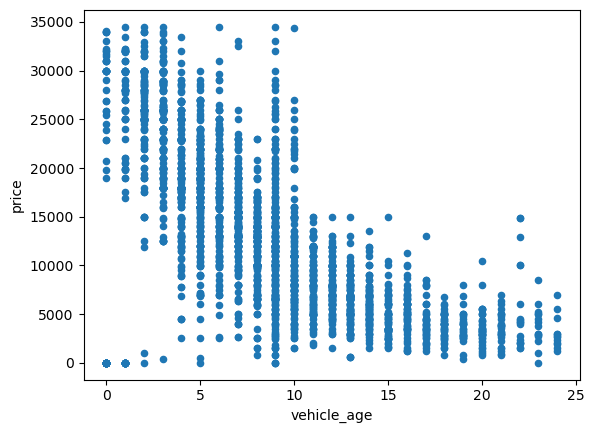

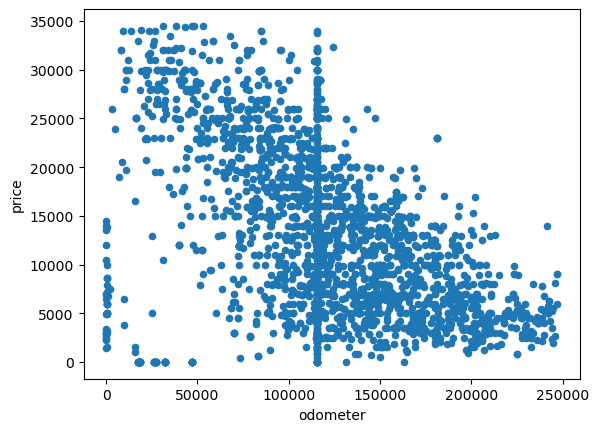

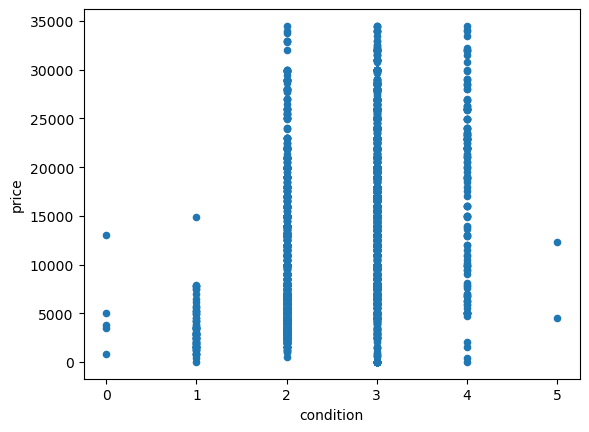

In [71]:
#Criando gráficos de dispersão para as variáveis 'vehicle_year','odometer' e 'condition'
colunas_3 = ['vehicle_age','odometer','condition']
for col in colunas_2:
    df_ford_150.plot(x=col,y='price',kind = 'scatter')

Conclusão geral:

Em primeiro lugar, verificamos se o dataframe possuia valores ausentes, o que de fato possuia. Para a coluna 'is_4wd' substituímos os valores ausentes por zero, que indicava que o carro não era 4x4. Para a coluna 'paint_color', substituímos os valores ausentes pela sigla 'NE', que indicava que o carro não tinha cor especificada. Para as demais variáveis numéricas, substituímos os valores ausentes pela média ou mediana dos valores por modelo. Em segundo lugar, fez se necessário a alteração do tipo de dados para algumas colunas. Em terceiro lugar, criamos novas colunas contendo o dia, o mês e ano em que a propaganda foi colocada, além de criar uma nova coluna com a idade do veículo, desde quando a propaganda foi colocada. E por fim, alteramos os valores string da coluna 'condition' por valores numéricos.

Originalmente, algumas colunas continham valores atípicos, os quais foram eliminados, pois filtramos o dataframe em uma nova variável, a qual não continha estes valores atípicos. Eles estavam puxando a média para cima em diversas colunas, o que estava dificultando a análise da maior parte dos carros.
Utilizamos o dataframe filtrado para fazer as demais análises necessárias. A primeira conclusão que chegamos é que os carros que são anormalmente vendidos mais rapidamente, são modelos que possuem um número significativamente maior de propagandas, em relação aos modelos que demoram mais tempo para serem vendidos. Ou seja, são modelos mais populares.
A próxima conclusão é que os modelos mais populares são: 

- Chevrolet Silverado 1500
- Ford F_150

Para o Chevrolet Silverado 1500, os carros que possuem preço maior são carros de transmissão automática e que possuem menos kilometragem. 
Para o Ford F_150, os carros que possuem maior preço também são carros de transmissão automática, porém existem alguns carros de transmissão manual (valores atípicos) que possuem um preço mais elevado. Da mesma forma que Chevrolet Silverado, o Ford F_150 também tem o preço mais elevado quando possui menos kilometragem. Conclui-se então, a partir da análise dos dois modelos, que as variáveis que mais impactam o preço são a kilometragem ('odometer') e transmissão('transmission').
Em relação a cores, para os dois modelos, as cores laranja, amarelo e roxo são menos predominantes, enquanto para o Chevrolet Silverado, as cores mais predominantes são preto, branco e prata. Já para o Ford F_150, as cores predominantes são branco, não especificado, preto e custom. 